In [16]:
import pandas as pd

dfTrain = pd.read_csv("af2_dataset_training_labeled.csv.gz", index_col=0)

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [18]:
df_train.columns

Index(['annotation_sequence', 'feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F',
       'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N',
       'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W',
       'feat_Y', 'annotation_atomrec', 'feat_PHI', 'feat_PSI', 'feat_TAU',
       'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_H',
       'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I',
       'feat_DSSP_T', 'feat_DSSP_S', 'feat_DSSP_6', 'feat_DSSP_7',
       'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11',
       'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z',
       'entry', 'entry_index', 'y_Ligand'],
      dtype='object')

In [36]:
X = dfTrain.copy().dropna()
y = X.pop("y_Ligand")
a = X["annotation_atomrec"].unique()
b = X["entry"].unique()
dAnnotationAtomrec = {}
for i in range(len(a)):
    t = a[i]
    dAnnotationAtomrec[t] = i
dEntry = {}
for i in range(len(b)):
    t = b[i]
    dEntry[t] = i
X["annotation_atomrec"] = \
    X["annotation_atomrec"].map(dAnnotationAtomrec)
X["entry"] = \
    X["entry"].map(dEntry)
dBool = {}
dBool[True] = 0
dBool[False] = 1
y = y.map(dBool)

0      1
1      1
2      1
3      1
4      1
      ..
755    1
756    1
757    1
758    1
759    1
Name: y_Ligand, Length: 484477, dtype: int64

In [37]:



featureNum = ['annotation_atomrec', 'feat_PHI', 'feat_PSI', 'feat_TAU',
       'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_6', 'feat_DSSP_7',
       'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11',
       'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z','entry']
featureCat = ['feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F',
       'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N',
       'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W',
       'feat_Y', 'feat_DSSP_H', 'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I',
       'feat_DSSP_T', 'feat_DSSP_S']
preprocessor = make_column_transformer(
    (StandardScaler(),featureNum),
    (OneHotEncoder(),featureCat)
)
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]


In [40]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', input_shape=input_shape),
    layers.Dropout(0.30),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.30),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.30),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
1420/1420 [==============================] - 137s 96ms/step - loss: 0.1441 - binary_accuracy: 0.9638 - val_loss: 0.1444 - val_binary_accuracy: 0.9645
Epoch 2/100
1420/1420 [==============================] - 124s 87ms/step - loss: 0.1359 - binary_accuracy: 0.9645 - val_loss: 0.1289 - val_binary_accuracy: 0.9647
Epoch 3/100
1420/1420 [==============================] - 143s 101ms/step - loss: 0.1260 - binary_accuracy: 0.9649 - val_loss: 0.1224 - val_binary_accuracy: 0.9657
Epoch 4/100
1420/1420 [==============================] - 137s 97ms/step - loss: 0.1223 - binary_accuracy: 0.9655 - val_loss: 0.1227 - val_binary_accuracy: 0.9660
Epoch 5/100
1420/1420 [==============================] - 3466s 2s/step - loss: 0.1201 - binary_accuracy: 0.9657 - val_loss: 0.1198 - val_binary_accuracy: 0.9662
Epoch 6/100
1420/1420 [==============================] - 162s 114ms/step - loss: 0.1183 - binary_accuracy: 0.9662 - val_loss: 0.1190 - val_binary_accuracy: 0.9663
Epoch 7/100
1420/1420 [====

Best Validation Loss: 0.1116
Best Validation Accuracy: 0.9686


C:\Users\jeffe\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


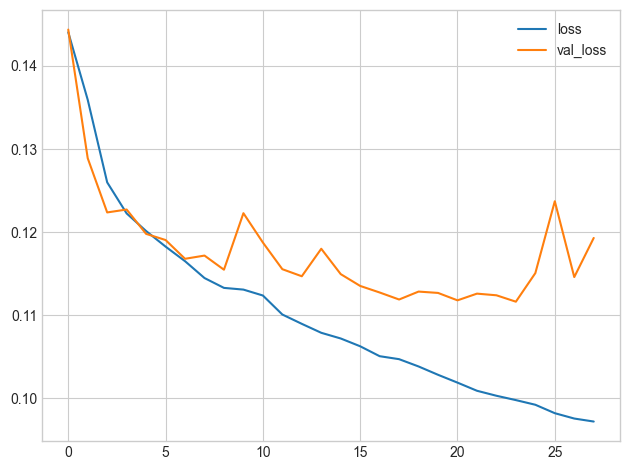

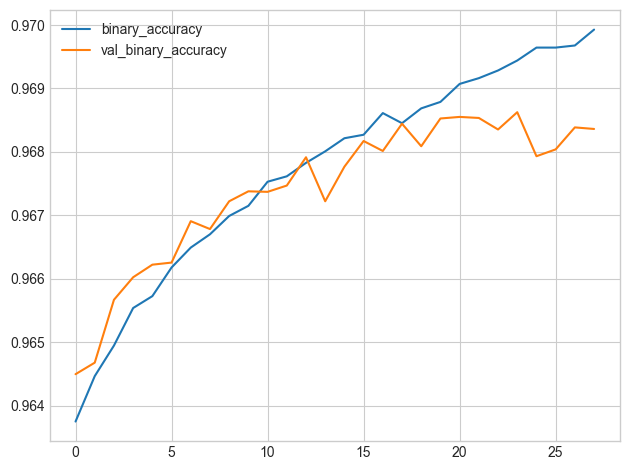

In [41]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [43]:
model.save('results/model2')


INFO:tensorflow:Assets written to: results/model1\assets


INFO:tensorflow:Assets written to: results/model1\assets


In [53]:
Xpre = X.copy()
resultTrain = model.predict(preprocessor.transform(Xpre))
resultTrain

15140/15140 [==============================] - 92s 6ms/step


array([[0.9972358 ],
       [0.9992651 ],
       [0.9998919 ],
       ...,
       [0.960461  ],
       [0.9471325 ],
       [0.92007446]], dtype=float32)

In [77]:
test = pd.read_csv("af2_dataset_testset_unlabeled.csv.gz", index_col=0)
X_test = test.copy()
X_test["annotation_atomrec"] = X_test["annotation_atomrec"].map(dAnnotationAtomrec)
X_test['entry'] = X_test['entry'].map((lambda p: 0))
X_test = preprocessor.transform(X_test)
resultTest = model.predict(X_test,verbose=0)
resultTest

array([[0.99999684],
       [1.        ],
       [1.        ],
       ...,
       [0.99886477],
       [0.9992345 ],
       [0.999843  ]], dtype=float32)

In [78]:
resultList = []
for i in range(len(resultTest)):
    if resultTest[i][0]>0.5:
        resultList.append(False)
    else:
        resultList.append(True)
result = pd.Series(resultList,name="Predicted")
result


0         False
1         False
2         False
3         False
4         False
          ...  
107619    False
107620    False
107621    False
107622    False
107623    False
Name: Predicted, Length: 107624, dtype: bool

In [79]:
pd.DataFrame(result).to_csv("results/modelResult1.csv")